# Final Project : Networks in Dolphin Communities
## Finn O'Connor, Charlie Kauffman, Andrew Dean


### Learning About the Network

What are the nodes? How many of them are there? 

What are the edges? How many of them are there? 

Is it weighted or unweighted?

If weighted, what do the weights represent/mean?

Is the graph directed or undirected?

Is it connected or disconnected? If disconnected, is there a giant component?

Is there anything interesting or weird about this network?

What's the context of this network?

The context of this network is a community of dolphins that live in Doubtful Sound, which is an area in New Zealand. The network sought to study and understand the relationships of the dolphins, based off of gender as well as frequency of interactions. The research on which this network was based also tried to highlight how different ecological factors influence this community of dolphins in particular. 

Do you have access to any metadata about the nodes?






### Creating the Adjacency Matrix

In [1]:
#Imports the necessary packages to graph our network

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Loads both the numpy and gml file, where the gml file contains the names of the dolphins
Dolphins = np.load( 'dolphins.npy')
dolphin_graph = nx.read_gml('dolphins.gml')



In [3]:
#Prints the adjacency matrix of the numpy file, printing the gml file tells us the number 
    #of edges and nodes in the graph
print(Dolphins)
print(dolphin_graph)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Graph with 62 nodes and 159 edges


### Creating an Initial Plot of the Network

In [4]:
#Loads the gml file as a graph object, being able to label our plots with the names
Dolphins_G = nx.to_networkx_graph(dolphin_graph)
Dolphins_G2= nx.to_networkx_graph(Dolphins)

In [5]:
#Defines the position for the layout of the graph, 
    #circular position was easiest to see the relationships
pos = nx.spring_layout(Dolphins_G)

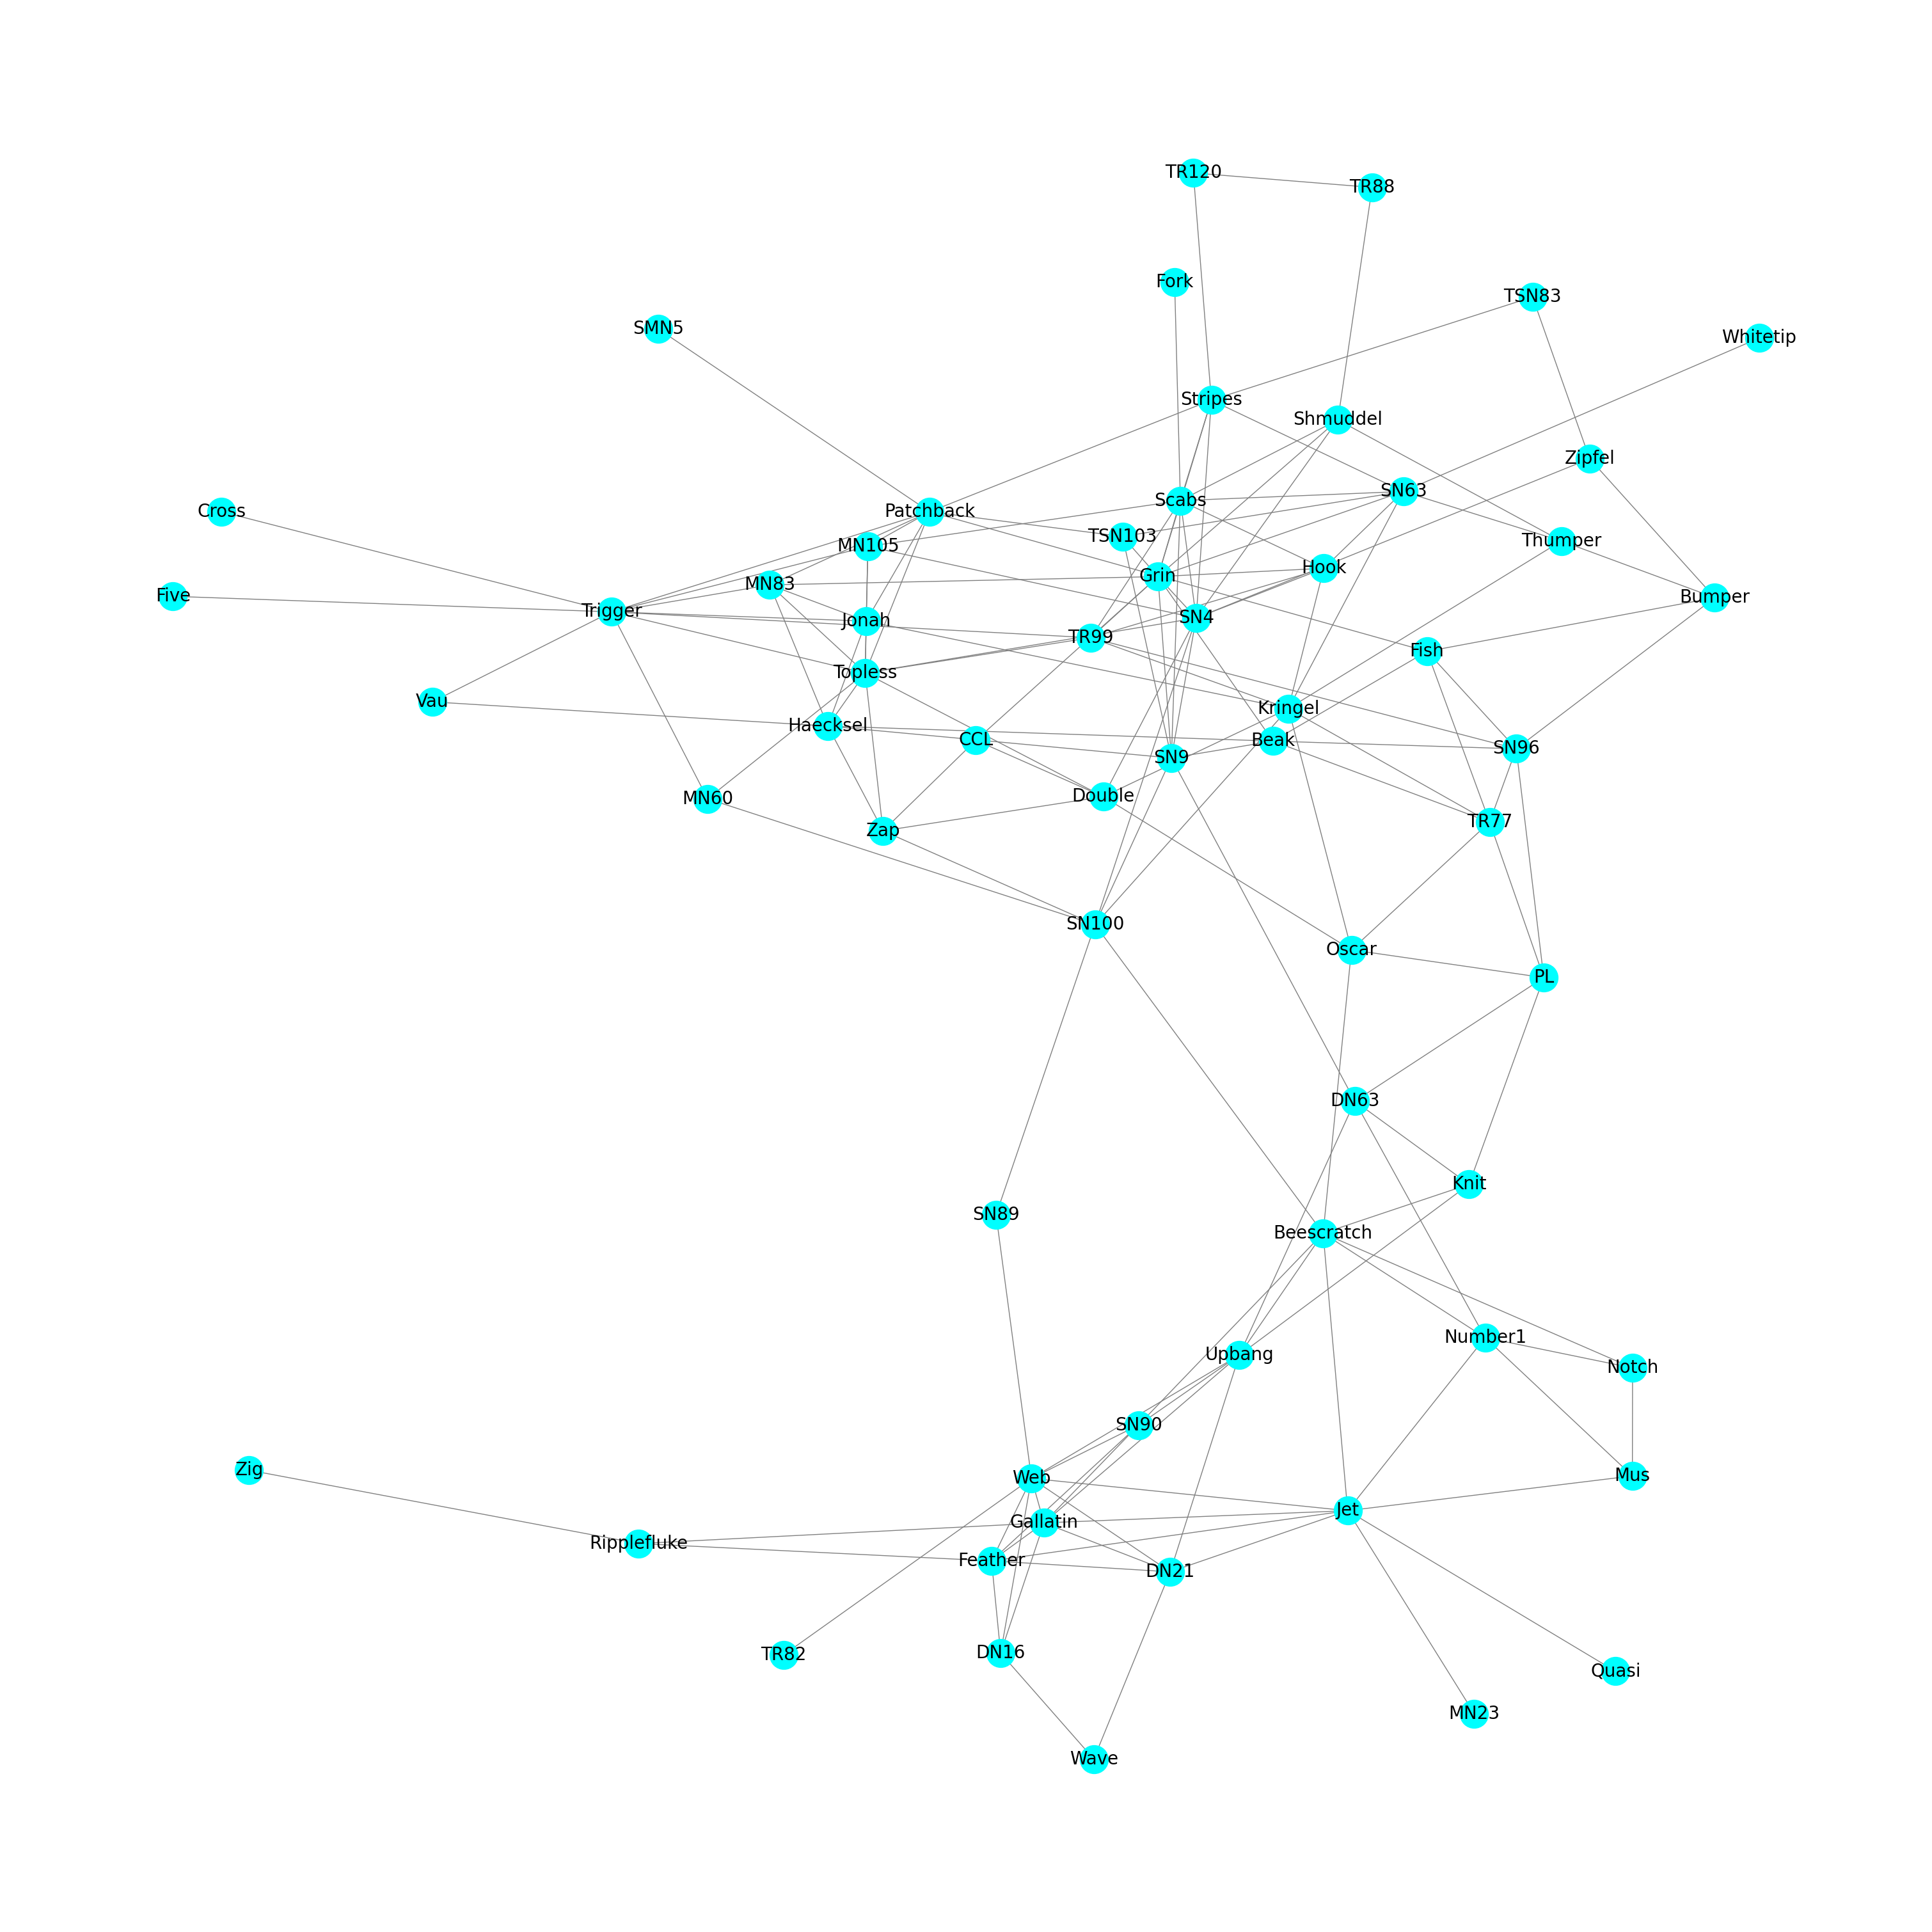

In [6]:
#Plots the graph for our whole network
plt.figure(figsize = (30,30) )
nx.draw(Dolphins_G, pos, node_color='cyan', 
        node_size=1000, edge_color='grey', with_labels=True, font_size = 20)

### Understanding the Centrality of the Network

### Finding and Plotting Communities in the Network

In [28]:
comm = nx.algorithms.community.girvan_newman(Dolphins_G)
gn_communities1 = tuple(sorted(c) for c in next(comm))


import matplotlib.cm as cmx
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=300, edge_color='grey', with_labels=True)
    plt.show()
    return


Plot_Comm(Dolphins_G, gn_communities1)

TypeError: list indices must be integers or slices, not str

In [14]:
np.allclose(Dolphins, Dolphins.T)

True

True

In [15]:
##Connectedness of the network##
print(nx.is_connected(dolphin_graph))
print(nx.number_connected_components(dolphin_graph))

True
1


### Reporting on One Other Element of the Network
Average Shortest Path

In [16]:
print(nx.average_shortest_path_length(dolphin_graph))

3.3569539925965097


In [17]:
##Degree Distribution

<BarContainer object of 12 artists>

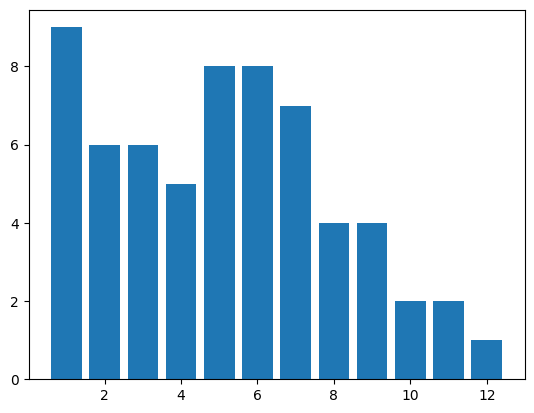

In [18]:
degree_sequence = sorted((d for n, d in dolphin_graph.degree()), reverse=True)
plt.bar(*np.unique(degree_sequence, return_counts=True))

In [22]:
##Clustering Coefficient
Dolphins_Cluster = nx.algorithms.clustering(dolphin_graph)
print('The dolphin with lowest clustering coefficient is', min(Dolphins_Cluster, key=lambda key: Dolphins_Cluster[key]))

Average_CC_Dolphin = nx.algorithms.average_clustering(dolphin_graph)
print('The average clustering coefficient for the Dolphins network is ', Average_CC_Dolphin)

The dolphin with lowest clustering coefficient is Cross
The average clustering coefficient for the Dolphins network is  0.2589582460550202


### Conclusions About the Network

### Citations

D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations, Behavioral Ecology and Sociobiology 54, 396-405 (2003).

D. Lusseau, The emergent properties of a dolphin social network, Proc. R. Soc. London B (suppl.) 270, S186-S188 (2003).

D. Lusseau, Evidence for social role in a dolphin social network, Preprint q-bio/0607048 (http://arxiv.org/abs/q-bio.PE/0607048)